### <center>Assignment No. 1<br></center>

Name: Aditya Rokade<br>
Roll No. 63 (B)<br>

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.<br>
Perform following tasks:<br>
1. Pre-process the dataset.<br>
2. Identify outliers.<br>
3. Check the correlation.<br>
4. Implement linear regression and random forest regression models.<br>
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DATASETS/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.drop(['Unnamed: 0', 'key'], axis = 1, inplace = True)

In [7]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace = True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace = True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5012\3723695594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace = True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_5012\3723695594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [9]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

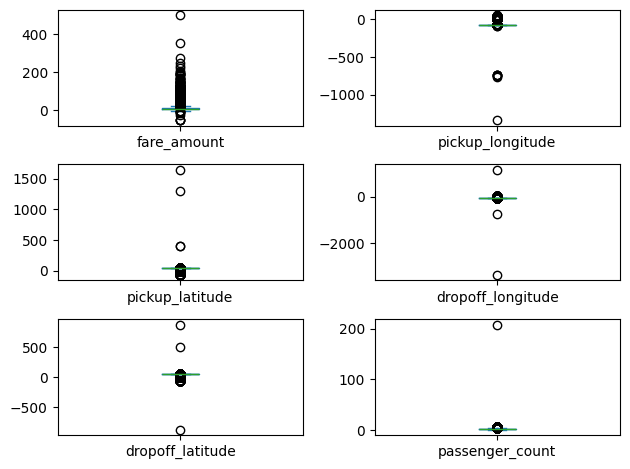

In [10]:
df.plot(kind = 'box', subplots = True, layout = (3,2), legend = True)
plt.tight_layout()

In [11]:
def remove_outliers(df):
    # Iterate over each numerical column
    for col in df.select_dtypes(include='number').columns:
        # Compute the first and third quartiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Compute the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip the values in the column in-place
        df[col] = np.clip(df[col], lower_bound, upper_bound)

# Example usage
# df is your DataFrame
remove_outliers(df)

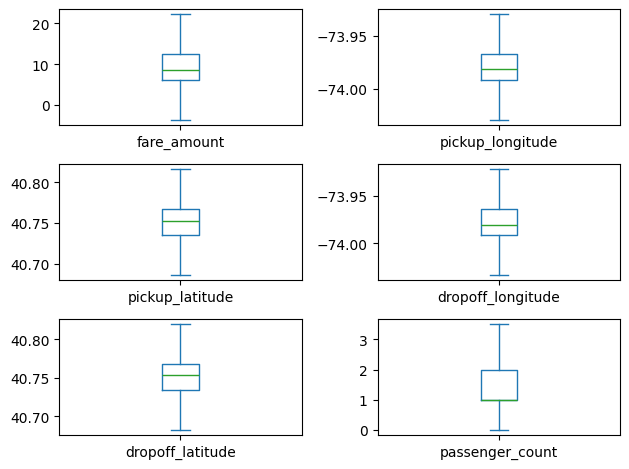

In [12]:
df.plot(kind = 'box', subplots = True, layout = (3,2), legend = True)
plt.tight_layout()

## Feature Extraction

In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc = True)

In [14]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['date'] = df['pickup_datetime'].dt.day
df['time'] = df['pickup_datetime'].dt.time

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,time
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,19:52:06
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,20:04:56
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,21:45:00
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,08:22:21
4,16.0,2014-08-28 17:47:00+00:00,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,28,17:47:00


In [16]:
df.drop(columns=['pickup_datetime'], inplace = True)

In [17]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,time
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,19:52:06
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,20:04:56
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,21:45:00
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,08:22:21
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,28,17:47:00
...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,10,28,10:49:00
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,14,01:09:00
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,2009,6,29,00:42:00
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,5,20,14:56:25


## Haversine Distance

In [18]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) | 
                               (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
                               (df.pickup_longitude > 90) | (df.pickup_longitude < -90) |
                               (df.dropoff_longitude > 90) | (df.dropoff_longitude < -90) ]
df.drop(incorrect_coordinates, inplace= True, errors = 'ignore')

In [19]:
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers. Use 3956 for miles
    r = 6371
    return c * r

# Calculate distance and add as a new column
df['distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)


In [20]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,time,distance
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,7,19:52:06,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,17,20:04:56,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,24,21:45:00,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,26,08:22:21,1.661683
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,28,17:47:00,4.116083
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,10,28,10:49:00,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,14,01:09:00,1.875050
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,2009,6,29,00:42:00,8.919406
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,5,20,14:56:25,3.539715


In [21]:
df.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis= 0,inplace = True)
df

,fare_amount,passenger_count,year,month,date,time,distance
0,7.50,1.0,2015,5,7,19:52:06,1.683323
1,7.70,1.0,2009,7,17,20:04:56,2.457590
2,12.90,1.0,2009,8,24,21:45:00,5.036377
3,5.30,3.0,2009,6,26,08:22:21,1.661683
4,16.00,3.5,2014,8,28,17:47:00,4.116083
...,...,...,...,...,...,...,...
199995,3.00,1.0,2012,10,28,10:49:00,0.112210
199996,7.50,1.0,2014,3,14,01:09:00,1.875050
199997,22.25,2.0,2009,6,29,00:42:00,8.919406
199998,14.50,1.0,2015,5,20,14:56:25,3.539715


In [22]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Extract hours from the time_column
df['hours_of_day'] = df['time'].apply(lambda x: x.hour)

# Drop the original time_column if no longer needed
df = df.drop(columns=['time'])

### Corelation

In [23]:
corr = df.corr()
corr

,fare_amount,passenger_count,year,month,date,distance,hours_of_day
fare_amount,1.000000,0.015778,0.141277,0.030817,0.004534,0.786388,-0.023623
passenger_count,0.015778,1.000000,-0.009749,0.010351,0.002712,0.009884,0.020274
year,0.141277,-0.009749,1.000000,-0.115859,-0.012170,0.022294,0.002156
month,0.030817,0.010351,-0.115859,1.000000,-0.017360,0.010050,-0.003926
date,0.004534,0.002712,-0.012170,-0.017360,1.000000,0.001709,0.004677
distance,0.786388,0.009884,0.022294,0.010050,0.001709,1.000000,-0.035708
hours_of_day,-0.023623,0.020274,0.002156,-0.003926,0.004677,-0.035708,1.000000


In [24]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression with all features

In [25]:
x1 = df[['passenger_count','year','month','date','distance','hours_of_day']]
y1 = df['fare_amount']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)

In [27]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_scaled,y1, test_size=0.35)

In [28]:
print(x1_train.shape,
y1_train.shape,
x1_test.shape,
y1_test.shape)

(130000, 6) (130000,) (70000, 6) (70000,)


In [29]:
m1 = LinearRegression()
linear_model1 = m1.fit(x1_train, y1_train)
linear_model1

LinearRegression()

In [30]:
y1_pred = linear_model1.predict(x1_test)

In [31]:
mar1 = mean_absolute_error(y1_pred, y1_test)
mse1 = mean_squared_error(y1_pred, y1_test)
r21 = r2_score(y1_test, y1_pred)

print(f"Mean Absolute Error : {mar1:.2f}")
print(f"Mean Sqaured Error : {mse1:.2f}")
print(f"R-squared (R2): {r21:.2f}")

Mean Absolute Error : 2.21
Mean Sqaured Error : 10.85
R-squared (R2): 0.63


### Linear regression (x = year and distance)


In [32]:
x2 = df[['distance', 'year']]
y2 = df['fare_amount']

In [33]:
x2_scaled = scaler.fit_transform(x2)

In [34]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_scaled,y2, test_size=0.35)

In [35]:
print(x2_train.shape,
y2_train.shape,
x2_test.shape,
y2_test.shape)

(130000, 2) (130000,) (70000, 2) (70000,)


In [36]:
linear_model2 = m1.fit(x2_train, y2_train)
linear_model2

LinearRegression()

In [37]:
y2_pred = linear_model2.predict(x2_test)

In [38]:
mar2 = mean_absolute_error(y2_pred, y2_test)
mse2 = mean_squared_error(y2_pred, y2_test)
r22 = r2_score(y2_test, y2_pred)

print(f"Mean Absolute Error : {mar2:.2f}")
print(f"Mean Sqaured Error : {mse2:.2f}")
print(f"R-squared (R2): {r22:.2f}")

Mean Absolute Error : 2.22
Mean Sqaured Error : 10.84
R-squared (R2): 0.63


### Linear Regression with only distance

In [39]:
x3 = df[['distance']]
y3 = df['fare_amount']

x3_scaled = scaler.fit_transform(x3)


In [40]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3_scaled, y3, test_size= 0.3)
x3_train.shape

(140000, 1)

In [41]:
linear_model3 = m1.fit(x3_train, y3_train)
linear_model3

LinearRegression()

In [42]:
y3_pred = linear_model2.predict(x3_test)

In [43]:
y3_pred = linear_model2.predict(x3_test)

In [44]:
mar3 = mean_absolute_error(y3_pred, y3_test)
mse3 = mean_squared_error(y3_pred, y3_test)
r23 = r2_score(y3_test, y3_pred)

print(f"Mean Absolute Error : {mar3:.2f}")
print(f"Mean Sqaured Error : {mse3:.2f}")
print(f"R-squared (R2): {r23:.2f}")

Mean Absolute Error : 2.31
Mean Sqaured Error : 11.46
R-squared (R2): 0.62


### Random Forest with Distance and Year

In [45]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
xrf2_train, xrf2_test, yrf2_train, yrf2_test = train_test_split(x2_scaled, y2, test_size=0.30)  

In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(xrf2_train, yrf2_train)

# Make predictions on the test data
yrf2_pred = rf_model.predict(xrf2_test)

In [48]:
mar = mean_absolute_error(yrf2_test, yrf2_pred)
mse = mean_squared_error(yrf2_test, yrf2_pred)
r2 = r2_score(yrf2_test, yrf2_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error : {mar:.2f}")
print(f"Mean Sqaured Error : {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error : 2.31
Mean Sqaured Error : 11.77
R-squared (R2): 0.60


### Random Forest with all features

In [49]:
xrf1_train, xrf1_test, yrf1_train, yrf1_test = train_test_split(x1_scaled,y1, test_size=0.25)

In [50]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(xrf1_train, yrf1_train)

# Make predictions on the test data
yrf1_pred = rf_model.predict(xrf1_test)

In [51]:
mar = mean_absolute_error(yrf1_test, yrf1_pred)
mse = mean_squared_error(yrf1_test, yrf1_pred)
r2 = r2_score(yrf1_test, yrf1_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error : {mar:.2f}")
print(f"Mean Sqaured Error : {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error : 2.06
Mean Sqaured Error : 9.37
R-squared (R2): 0.68
